**Dataset**

In [ ]:
!git clone 'https://github.com/sachin327/GAN'

Cloning into 'GAN'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14076 (delta 0), reused 18 (delta 0), pack-reused 14057
Receiving objects: 100% (14076/14076), 425.47 MiB | 44.42 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (14071/14071), done.


**mount gdrive to store trained model**

In [ ]:
#mount gdrive to store trained model
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


**importing necessary libraries**

In [ ]:
import tensorflow as tf

In [ ]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from PIL import Image 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization,Conv2DTranspose,UpSampling2D,LeakyReLU,Add,Input
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras
from sklearn.utils import shuffle

In [ ]:
from keras import Model

In [ ]:
import glob

**converting image data to numpy array**

In [ ]:
x1=[]
x2=[] 
i=0
for filename in glob.glob('/content/GAN/underwater_images/trainB_1/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0):
    print(i)  
  i+=1
for filename in glob.glob('/content/GAN/underwater_images/trainB_2/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0): 
    print(i)
  i+=1
for filename in glob.glob('/content/GAN/underwater_images/trainB_3/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0):
    print(i)  
  i+=1
for filename in glob.glob('/content/GAN/underwater_images/trainB_4/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0):
    print(i)  
  i+=1
for filename in glob.glob('/content/GAN/underwater_images/trainB_5/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0):
    print(i)  
  i+=1
for filename in glob.glob('/content/GAN/underwater_images/trainB_6/*.jpg'):
  x1.append(np.array(Image.open(filename)))
  x2.append(np.array(Image.open(filename[:36]+'A'+filename[37:]))) 
  if (i%100==0):
    print(i)  
  i+=1

In [ ]:
x1=np.array(x1)
x2=np.array(x2) 

**Importing imception model for discriminator**

In [ ]:
from keras.applications.inception_v3 import InceptionV3 

In [ ]:
model4 = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))

**Creating fun for custom loss**

In [ ]:
def custom_loss_gan(model_):
  def loss(yTrue,yPred):
    L1=tf.reduce_mean(abs(model_(yTrue[:,:,:,0:3])-yTrue[:,:,:,3:]))
    epsilon=1e-12
    return -tf.reduce_mean([tf.reduce_mean(tf.math.log(yPred[i][:,:,1]+epsilon)) for i in range(len(yTrue))])+50*L1
  return loss 

In [ ]:
def custom_loss_dis(model_):
  epsilon=1e-12
  def loss(yTrue,yPred):
    return -tf.reduce_mean([(tf.reduce_sum(yTrue[i][:,:,0]/196)*tf.reduce_mean(tf.math.log(yPred[i][:,:,0]+epsilon)))+(tf.reduce_sum(yTrue[i][:,:,1]/196)*tf.reduce_mean(tf.math.log(yPred[i][:,:,1]+epsilon))) for i in range(len(yTrue))])
  return loss 

**implimanting generator model**

In [ ]:
input_=Input(shape=(256,256,3))
model=Conv2D(64,(4,4),strides=(2,2),padding='same',input_shape=(256,256,3))(input_)
output_=LeakyReLU(alpha=0.2)(model) 

output1=Conv2D(128,(4,4),strides=(2,2),padding='same')(output_) 
output3=BatchNormalization()(output1)
output4=LeakyReLU(alpha=0.2)(output3)

layer11=Conv2D(64,(5,5),padding='same')(output4) 
layer11=LeakyReLU(0.2)(layer11) 

layer21=Conv2D(64,(3,3),padding='same')(output4) 
layer21=LeakyReLU(0.2)(layer21) 

next=tf.keras.layers.concatenate([output4,layer11, layer21], axis = 3) 

layer31=Conv2D(128,(5,5),padding='same')(next) 
layer31=LeakyReLU(0.2)(layer31) 

layer41=Conv2D(128,(3,3),padding='same')(next) 
layer41=LeakyReLU(0.2)(layer41)

layer51=Conv2D(128,(1,1),padding='same')(output4) 

next1=tf.keras.layers.concatenate([layer31,layer41, layer51], axis = 3) 
next1=Conv2D(128,(1,1))(next1) 
next1=LeakyReLU(0.2)(next1)

output5=Add()([output4,next1])

layer12=Conv2D(64,(5,5),padding='same')(output5) 
layer12=LeakyReLU(0.2)(layer12) 

layer22=Conv2D(64,(3,3),padding='same')(output5) 
layer22=LeakyReLU(0.2)(layer22) 

next2=tf.keras.layers.concatenate([output5,layer12, layer22], axis = 3) 

layer32=Conv2D(128,(5,5),padding='same')(next2) 
layer32=LeakyReLU(0.2)(layer32) 

layer42=Conv2D(128,(3,3),padding='same')(next2) 
layer42=LeakyReLU(0.2)(layer42)

layer52=Conv2D(128,(1,1),padding='same')(output5) 

next3=tf.keras.layers.concatenate([layer32,layer42, layer52], axis = 3) 
next3=Conv2D(128,(1,1))(next3) 
next3=LeakyReLU(0.2)(next3)

output6=Add()([output5,next3])

layer13=Conv2D(64,(5,5),padding='same')(output6) 
layer13=LeakyReLU(0.2)(layer13) 

layer23=Conv2D(64,(3,3),padding='same')(output6) 
layer23=LeakyReLU(0.2)(layer23) 

next4=tf.keras.layers.concatenate([output6,layer13, layer23], axis = 3) 

layer33=Conv2D(128,(5,5),padding='same')(next4) 
layer33=LeakyReLU(0.2)(layer33) 

layer43=Conv2D(128,(3,3),padding='same')(next4) 
layer43=LeakyReLU(0.2)(layer43)

layer53=Conv2D(128,(1,1),padding='same')(output6) 

next5=tf.keras.layers.concatenate([layer33,layer43, layer53], axis = 3) 
next5=Conv2D(128,(1,1))(next5) 
next5=LeakyReLU(0.2)(next5)

output7=Add()([output5,output6,next5]) 

transpose1=Conv2DTranspose(64,(4,4),strides=(2,2),padding='same')(output7)
transpose1=BatchNormalization()(transpose1)
transpose1=LeakyReLU(alpha=0.2)(transpose1)

transpose2=Add()([transpose1,output_]) 
transpose2=Conv2DTranspose(3,(4,4),strides=(2,2),padding='same',activation='tanh')(transpose2) 

gen=Model(inputs = input_, outputs = transpose2)

In [ ]:
gen.summary()

Model: "model_40"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_642 (Conv2D)             (None, 128, 128, 64) 3136        input_13[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_126 (LeakyReLU)     (None, 128, 128, 64) 0           conv2d_642[0][0]                 
__________________________________________________________________________________________________
conv2d_643 (Conv2D)             (None, 64, 64, 128)  131200      leaky_re_lu_126[0][0]            
___________________________________________________________________________________________

**implimanting discriminator model with the help of pretrained inception model**

In [ ]:
outputs=(model4.layers)[240].output
pred=Conv2D(2,1, activation='softmax' )(outputs)
dis=Model(inputs = model4.input, outputs = pred)

In [ ]:
dis.summary()

Model: "model_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_548 (Conv2D)             (None, 127, 127, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_390 (BatchN (None, 127, 127, 32) 96          conv2d_548[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 127, 127, 32) 0           batch_normalization_390[0][0]    
___________________________________________________________________________________________

**defining loss optimizer**

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
dis.compile(loss=custom_loss_dis(1), optimizer=opt,metrics=['accuracy'],run_eagerly=False) 

**creating GAN combination of gen and dis**

In [ ]:
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  # connect them
  model4 = Sequential()
  # add generator
  model4.add(g_model)
  # add the discriminator 
  model4.add(d_model)
  return model4

In [ ]:
GAN=define_gan(gen,dis)

In [ ]:
# compile model
GAN.compile(optimizer=opt, loss=custom_loss_gan(gen),run_eagerly=False)

In [ ]:
GAN.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_40 (Functional)        (None, 256, 256, 3)       4645763   
_________________________________________________________________
model_41 (Functional)        (None, 14, 14, 2)         9640930   
Total params: 14,286,693
Trainable params: 14,266,341
Non-trainable params: 20,352
_________________________________________________________________


**generating data**

In [ ]:
def real_data(x,j,n):
  y=np.ones((n,14,14,1))
  xx=(x[j*n:(j+1)*n]/255)*2-1
  return xx,y
def fake_data(x,g_model,j,n):
  xx=g_model.predict((x[j*n:(j+1)*n]/255)*2-1)
  y_dis=np.zeros((n,14,14,1))
  return xx,y_dis 

**model training**

In [ ]:
def train(g_model, d_model, gan_model, X1,X2, n_epochs=60):
  bat_per_epo = 32
  # manually enumerate epochs 
  for i in range(30,n_epochs):
    # enumerate batches over the training set
    for j in range(186):
      d_model.trainable = True
      g_model.trainable = False
      # get randomly selected 'real' samples
      x_real, y_real = real_data(X1,j,bat_per_epo)
      # generate 'fake' examples 
      x_fake, y_fake = fake_data(X2,g_model,j,bat_per_epo)
      # create training set for the discriminator
      x, y = np.vstack((x_real, x_fake)), np.vstack((y_real, y_fake))
      y = keras.utils.to_categorical(y, 2) 
      # update discriminator model weights
      for ii in range(1):
        d_loss,_ = d_model.train_on_batch(x,y) 
      d_model.trainable = False
      g_model.trainable = True
      # prepare points in latent space as input for the generator
      x_gan = (X2[j*bat_per_epo:(j+1)*bat_per_epo]/255)*2-1
      # update the generator via the discriminator's error
      x=np.append(x_gan, x_real, axis =3)
      for ii in range(1):
        g_loss = gan_model.train_on_batch(x_gan, x)
      # summarize loss on this batch
      
      x_real, y_real = real_data(X1,j,bat_per_epo)
      x_fake, y_fake = fake_data(X2,g_model,j,bat_per_epo)
      y_real = keras.utils.to_categorical(y_real, 2) 
      y_fake = keras.utils.to_categorical(y_fake, 2) 
      acc1 = d_model.evaluate(x_real, y_real,verbose=0)
      acc2 = d_model.evaluate(x_fake, y_fake,verbose=0)
      print('>%d %d/%d, d_loss=%.5f d_real=%d d_fake=%d, g_loss=%.5f  ' % (i+1, j+1,186,d_loss*1e3, acc1[1]*100,acc2[1]*100,g_loss*1e3))
      im1=(x_fake[0]-np.amin(x_fake[0]))/(np.amax(x_fake[0])-np.amin(x_fake[0]))
      im1=Image.fromarray((im1*255).astype(np.uint8))
      im1 = im1.save("/content/images/"+str(i+1)+".jpg")
      del x
      del y
      del im1
      del x_real
      del x_fake 
      del y_real
      del y_fake
      del x_gan
      del acc1
      del acc2
      del d_loss
      del g_loss
    if (i%10==0):
      dis.save('/content/gdrive/MyDrive/GAN/models/dis_'+str(i)+'.h5')
      gen.save('/content/gdrive/MyDrive/GAN/models/gen_'+str(i)+'.h5')
      GAN.save('/content/gdrive/MyDrive/GAN/models/GAN_'+str(i)+'.h5')
  return 0

In [ ]:
train(gen,dis,GAN,x1,x2,n_epochs=100) 

>31 1/186, d_loss=550.58330 d_real=95 d_fake=70, g_loss=21692.43813  
>31 2/186, d_loss=531.10093 d_real=99 d_fake=67, g_loss=22298.81287  
>31 3/186, d_loss=487.50234 d_real=99 d_fake=68, g_loss=19271.41953  
>31 4/186, d_loss=437.70805 d_real=99 d_fake=69, g_loss=20045.24231  
>31 5/186, d_loss=403.80105 d_real=99 d_fake=62, g_loss=17896.21735  
>31 6/186, d_loss=402.89482 d_real=100 d_fake=49, g_loss=17115.16762  
>31 7/186, d_loss=402.76182 d_real=100 d_fake=44, g_loss=15569.81754  
>31 8/186, d_loss=410.61863 d_real=100 d_fake=26, g_loss=15141.90960  
>31 9/186, d_loss=456.83074 d_real=100 d_fake=20, g_loss=13547.76382  
>31 10/186, d_loss=468.17875 d_real=100 d_fake=17, g_loss=13820.37640  
>31 11/186, d_loss=459.72845 d_real=100 d_fake=23, g_loss=14608.44135  
>31 12/186, d_loss=452.20765 d_real=100 d_fake=21, g_loss=12979.32148  
>31 13/186, d_loss=444.61021 d_real=100 d_fake=37, g_loss=12990.89622  
>31 14/186, d_loss=387.46300 d_real=100 d_fake=41, g_loss=12936.31172  
>31 15

In [ ]:
aa=gen.predict((x1[0:20]/255)*2-1) 

In [ ]:
n=12 #checking for any random image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


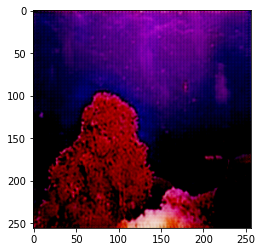

In [ ]:
plt.imshow(aa[n])  

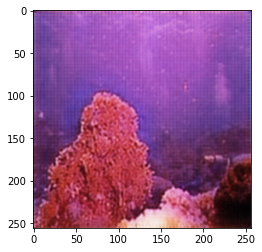

In [ ]:
ab=(aa[n]+1)/2 #rescaling image
plt.imshow((ab*255).astype(np.uint8))

In [ ]:
dis.save('/content/gdrive/MyDrive/GAN/models/dis.h5')

In [ ]:
gen.save('/content/gdrive/MyDrive/GAN/models/gen.h5')

In [ ]:
GAN.save('/content/gdrive/MyDrive/GAN/models/GAN.h5')

In [ ]:
#created by SACHIN JANGID